<a href="https://colab.research.google.com/github/mariaulia/2025_VISI-KOMPUTER/blob/main/JOBSHEET_2_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 2: KLASIFIKASI GAMBAR

##Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

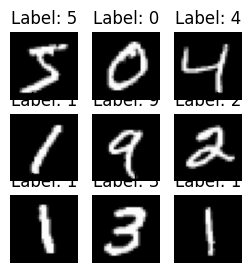

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(3,3))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

##Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


##Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.9001 - loss: 0.3196 - val_accuracy: 0.9878 - val_loss: 0.0471
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9863 - loss: 0.0443 - val_accuracy: 0.9897 - val_loss: 0.0432
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9910 - val_loss: 0.0360
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9920 - val_loss: 0.0368
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9900 - val_loss: 0.0461


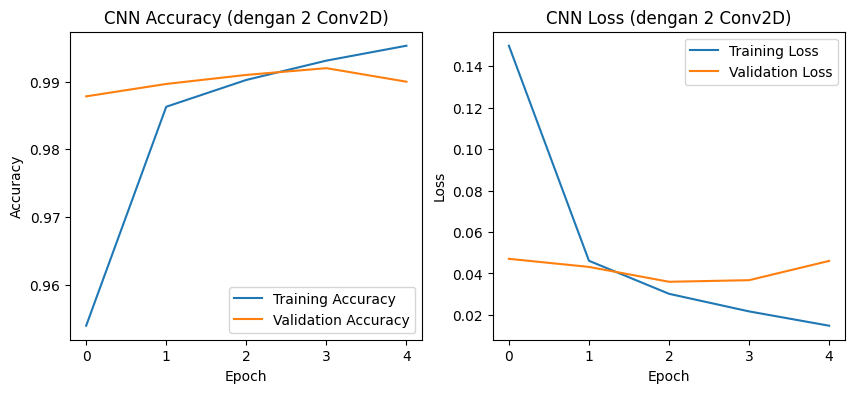

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# ==== Preprocessing ====
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

# ==== Model CNN dengan tambahan 1 Conv2D sebelum Flatten ====
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),   # Conv2D tambahan
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Training ====
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy (dengan 2 Conv2D)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss (dengan 2 Conv2D)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


##Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.2736 - loss: 1.9454 - val_accuracy: 0.4950 - val_loss: 1.4206
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.4598 - loss: 1.4890 - val_accuracy: 0.5638 - val_loss: 1.2370
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.5125 - loss: 1.3442 - val_accuracy: 0.6162 - val_loss: 1.0990
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5407 - loss: 1.2592 - val_accuracy: 0.6402 - val_loss: 1.0577
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.5689 - loss: 1.1982 - val_accuracy: 0.6466 - val_loss: 1.0177
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.5819 - loss: 1.1625 - val_accuracy: 0.6688 - val_loss: 0.9740
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5972 - loss: 1.1180 - val_accuracy: 0.6606 - val_loss: 0.9695
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.6187 -

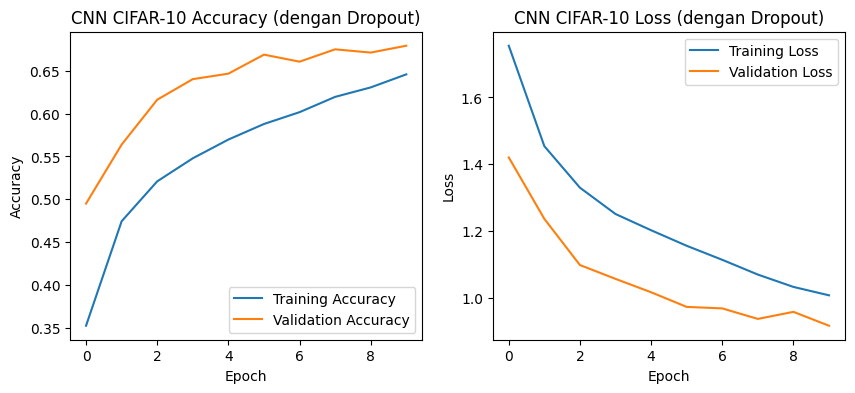

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

# ==== Load & normalisasi data ====
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# ==== Model CNN dengan Dropout ====
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                        # Dropout ditambahkan di sini
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Training ====
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot history ====
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy (dengan Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss (dengan Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


##Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 597s 423ms/step - accuracy: 0.5080 - loss: 1.4102 - val_accuracy: 0.6260 - val_loss: 1.0691
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 621s 423ms/step - accuracy: 0.6318 - loss: 1.0535 - val_accuracy: 0.6472 - val_loss: 1.0086
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 623s 443ms/step - accuracy: 0.6600 - loss: 0.9718 - val_accuracy: 0.6394 - val_loss: 1.0061
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 655s 423ms/step - accuracy: 0.6758 - loss: 0.9171 - val_accuracy: 0.6648 - val_loss: 0.9887
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 597s 424ms/step - accuracy: 0.6978 - loss: 0.8691 - val_accuracy: 0.6598 - val_loss: 0.9852


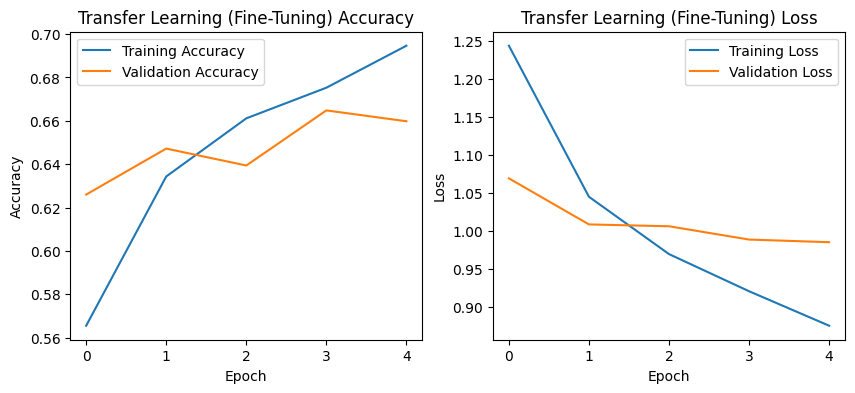

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# ==== Load base model ====
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# ==== Bekukan semua lapisan dulu ====
base_model.trainable = True
for layer in base_model.layers[:-2]:   # Bekukan semua kecuali 2 lapisan terakhir
    layer.trainable = False

# ==== Bangun model ====
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Training ====
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning (Fine-Tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning (Fine-Tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


##Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1000
           1       0.70      0.60      0.65      1000
           2       0.53      0.50      0.51      1000
           3       0.48      0.35      0.41      1000
           4       0.61      0.44      0.51      1000
           5       0.50      0.58      0.54      1000
           6       0.59      0.70      0.64      1000
           7       0.56      0.74      0.64      1000
           8       0.71      0.72      0.71      1000
           9       0.59      0.67      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



<Axes: >

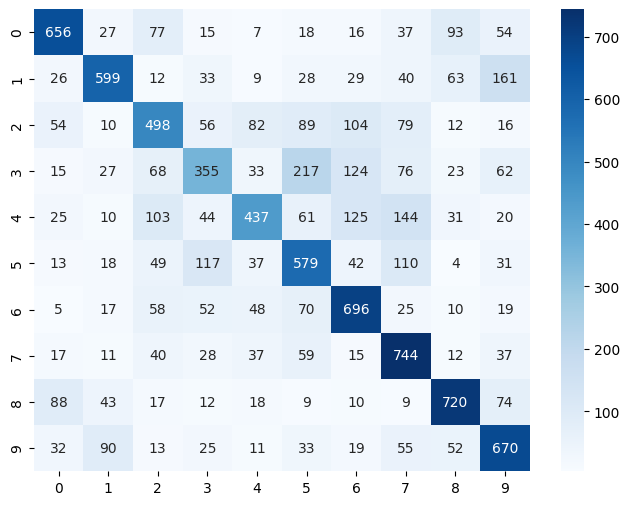

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##PENUGASAN

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - accuracy: 0.9103 - loss: 0.2898 - val_accuracy: 0.9868 - val_loss: 0.0444
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9900 - val_loss: 0.0369
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9900 - val_loss: 0.0363
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9892 - val_loss: 0.0414
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9961 - loss: 0.0113 - val_accuracy: 0.9898 - val_loss: 0.0449


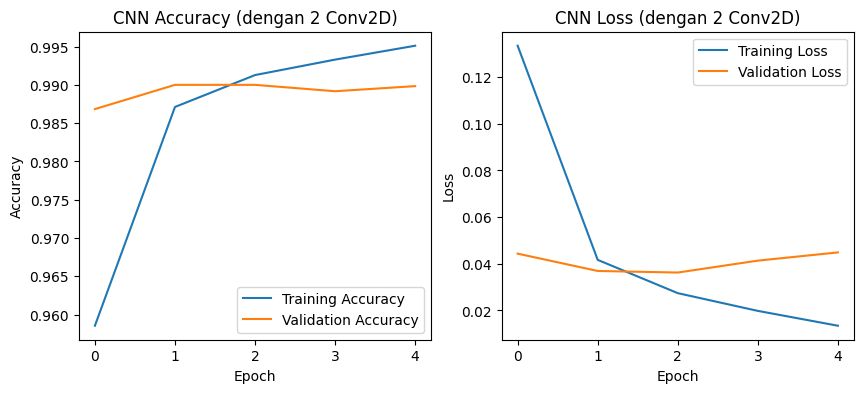

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ==== Load dataset MNIST ====
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# ==== Preprocessing ====
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

# ==== Model CNN dengan tambahan 1 Conv2D sebelum Flatten ====
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),   # Conv2D tambahan
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Training ====
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy (dengan 2 Conv2D)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss (dengan 2 Conv2D)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr

Saving angka 5.jpeg to angka 5.jpeg


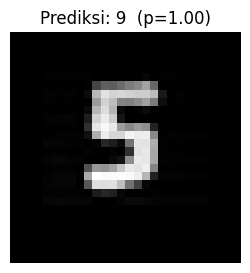

Rekap Prediksi (CNN):
- angka 5.jpeg -> 9 (p=0.999)


In [3]:
import matplotlib.pyplot as plt

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)

    # disp: PIL untuk ditampilkan, x: (28,28,1)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    # (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi model -> shape (10,)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3, 3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")